# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
!pip install citipy

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=Salt Lake City")


http://api.openweathermap.org/data/2.5/weather?units=metric&appid=7665a963f0347a80367e9f67aaed6233&q=Salt Lake City


In [23]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanning
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | morteros
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | lubango
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | queenstown
Processing Record 10 of Set 1 | tosontsengel
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | ashland
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | menongue
Processing Record 15 of Set 1 | zaragoza
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | bismarck
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | nkove
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | grand-bassam
Processing Record 22 of Set 1 | bredasdorp
Processing Reco

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nanning,22.8167,108.3167,27.25,94,96,2.31,CN,1722527348
1,margaret river,-33.9500,115.0667,10.81,63,91,3.41,AU,1722527349
2,olonkinbyen,70.9221,-8.7187,4.95,99,99,5.97,SJ,1722527350
3,morteros,-30.7116,-61.9986,26.12,37,100,9.16,AR,1722527351
4,waitangi,-43.9535,-176.5597,7.12,64,67,9.38,NZ,1722527353


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nanning,22.8167,108.3167,27.25,94,96,2.31,CN,1722527348
1,margaret river,-33.9500,115.0667,10.81,63,91,3.41,AU,1722527349
2,olonkinbyen,70.9221,-8.7187,4.95,99,99,5.97,SJ,1722527350
3,morteros,-30.7116,-61.9986,26.12,37,100,9.16,AR,1722527351
4,waitangi,-43.9535,-176.5597,7.12,64,67,9.38,NZ,1722527353


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

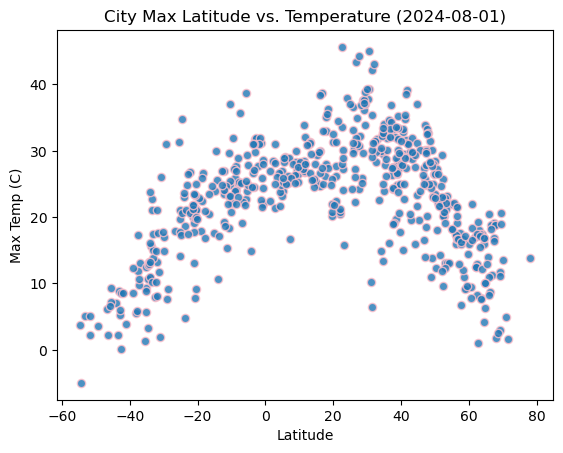

In [373]:
import time

# Build scatter plot for latitude vs. temperature
#YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="pink",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
#YOUR CODE HERE
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

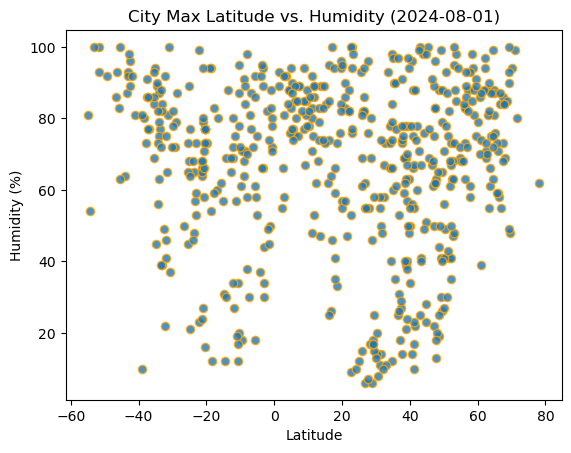

In [376]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

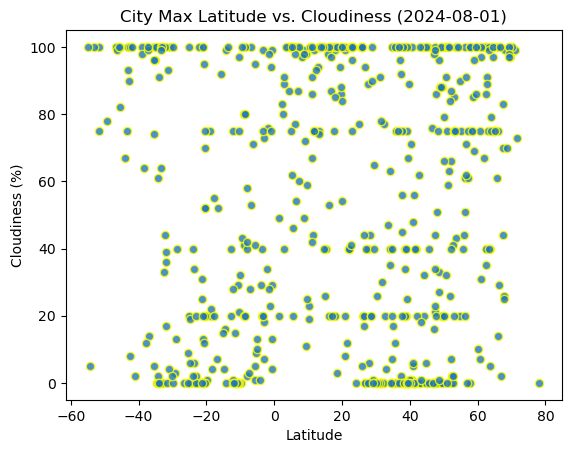

In [379]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

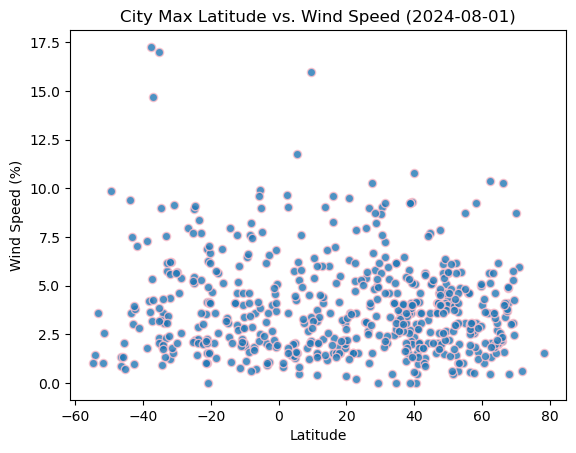

In [382]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="pink",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [431]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_value, y_value, xlab, ylab, title, text_coord):


    #Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel("Temp in Celcius")
    plt.title(title)
    print(f"The r-value is {rvalue ** 2} ")
    plt.show()

In [433]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nanning,22.8167,108.3167,27.25,94,96,2.31,CN,1722527348
2,olonkinbyen,70.9221,-8.7187,4.95,99,99,5.97,SJ,1722527350
6,tiksi,71.6872,128.8694,1.58,80,73,0.62,RU,1722527355
9,tosontsengel,48.7567,98.2839,10.91,88,96,1.47,MN,1722527359
10,vorgashor,67.5833,63.9500,19.14,73,70,4.13,RU,1722527360


In [435]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,10.81,63,91,3.41,AU,1722527349
3,morteros,-30.7116,-61.9986,26.12,37,100,9.16,AR,1722527351
4,waitangi,-43.9535,-176.5597,7.12,64,67,9.38,NZ,1722527353
5,lubango,-14.9172,13.4925,23.92,31,4,3.09,AO,1722527354
7,luderitz,-26.6481,15.1594,17.98,50,0,7.97,NaN,1722527356


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.31812940525707784 


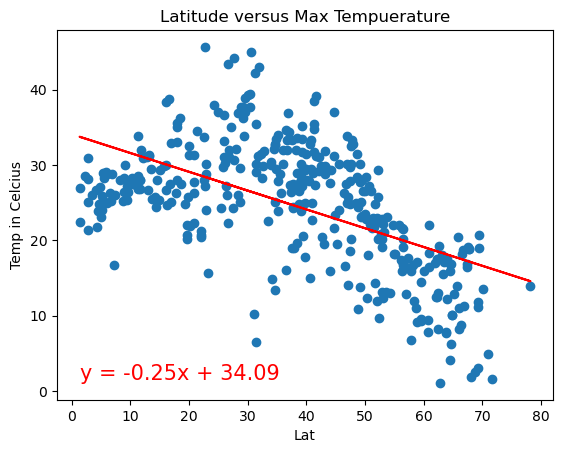

In [438]:
# Linear regression on Northern Hemisphere
#YOUR CODE HERE
min_x = int(min(northern_hemi_df["Lat"]))
min_y = int(min(northern_hemi_df["Max Temp"]))
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
title = "Latitude versus Max Tempuerature"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Max Temp", title, [min_x+.5,min_y+.5])

The r-value is 0.6477174325766291 


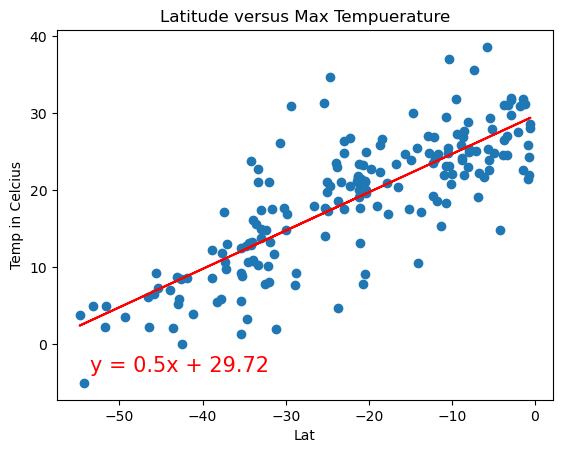

In [440]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
min_x = int(min(southern_hemi_df["Lat"]))
min_y = int(min(southern_hemi_df["Max Temp"]))
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
title = "Latitude versus Max Tempuerature"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Max Temp", title, [min_x+.5,min_y+.5])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 1.770191379979372e-05 


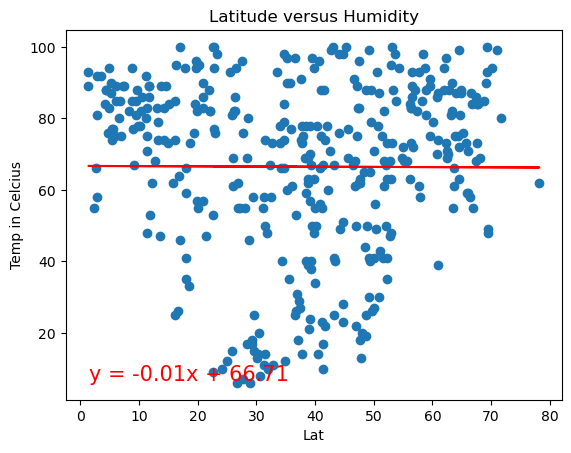

In [444]:
# Northern Hemisphere
# YOUR CODE HERE
min_x = int(min(northern_hemi_df["Lat"]))
min_y = int(min(northern_hemi_df["Humidity"]))
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
title = "Latitude versus Humidity"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Humidity", title, [min_x+.5,min_y+.5])

The r-value is 0.07011083237359295 


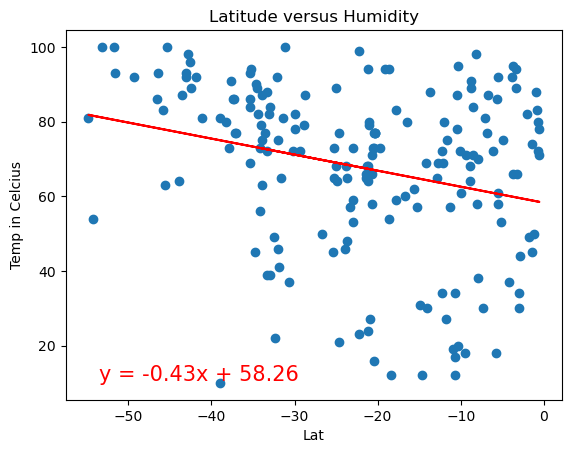

In [446]:
# Southern Hemisphere
# YOUR CODE HERE
min_x = int(min(southern_hemi_df["Lat"]))
min_y = int(min(southern_hemi_df["Humidity"]))
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
title = "Latitude versus Humidity"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Humidity", title, [min_x+.5,min_y+.5])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0054281376303262074 


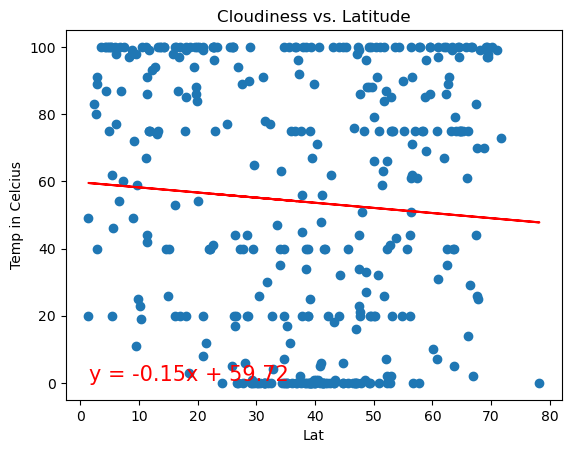

In [450]:
# Northern Hemisphere
# YOUR CODE HERE
min_x = int(min(northern_hemi_df["Lat"]))
min_y = int(min(northern_hemi_df["Cloudiness"]))
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Latitude"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Cloudiness", title, [min_x+.5,min_y+.5])

The r-value is 0.06645590466210664 


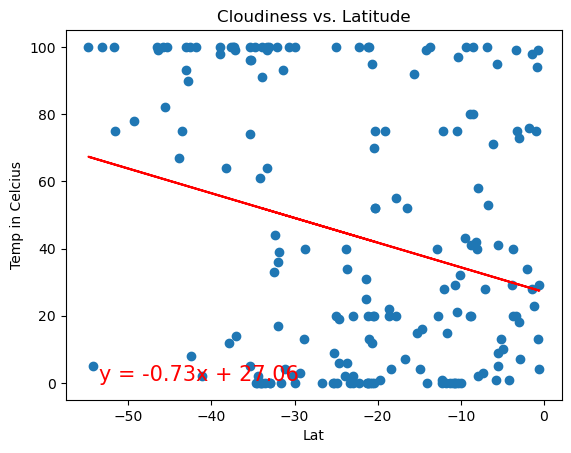

In [452]:
# Southern Hemisphere
# YOUR CODE HERE
min_x = int(min(southern_hemi_df["Lat"]))
min_y = int(min(southern_hemi_df["Cloudiness"]))
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Latitude"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Cloudiness", title, [min_x+.5,min_y+.5])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.004283901326568285 


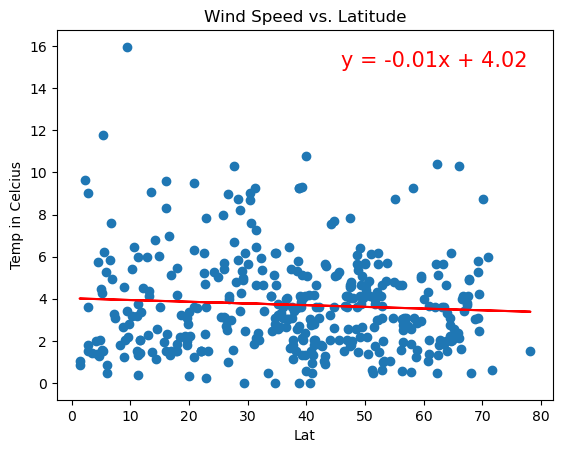

In [456]:
# Northern Hemisphere
# YOUR CODE HERE
min_x = int(min(northern_hemi_df["Lat"]))
min_y = int(min(northern_hemi_df["Wind Speed"]))
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
title = "Wind Speed vs. Latitude"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Wind Speed", title, [min_x+45,min_y+15])

The r-value is 0.0019185902067044064 


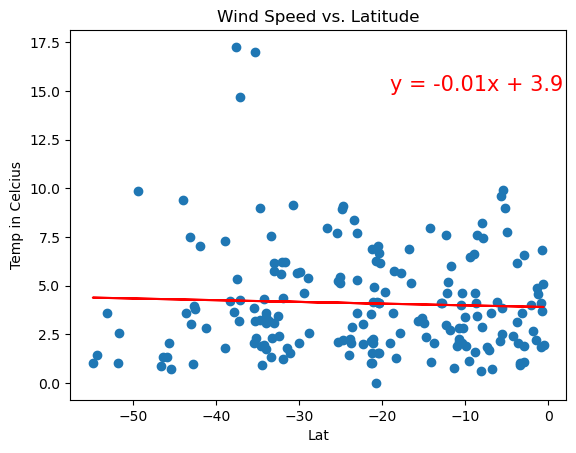

In [458]:
# Southern Hemisphere
# YOUR CODE HERE
min_x = int(min(southern_hemi_df["Lat"]))
min_y = int(min(southern_hemi_df["Wind Speed"]))
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
title = "Wind Speed vs. Latitude"
#Calling the function 
plot_linear_regression(x, y, "Lat", "Wind Speed", title, [min_x+35,min_y+15])

**Discussion about the linear relationship:** YOUR RESPONSE HERE